In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from xgcm import Grid

In [5]:
ds_seq2_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2/cont__4208_045.nc", decode_times=False)
ds_seq2_contnew = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/cont__4911_274.nc", decode_times=False)
ds_seq3_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/cont__5607_060.nc", decode_times=False)
ds_seq0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/cont__5308_170.nc", decode_times=False)
ds_scurl0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/cont__5607_060.nc", decode_times=False)

ds_eq2_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/cont__4303_021.nc", decode_times=False)
ds_eq3_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/cont__3208_295.nc", decode_times=False)
ds_eq0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/cont__3023_341.nc", decode_times=False)
ds_curl0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/new/cont__4208_045.nc", decode_times=False)

In [7]:
def diff(target,ds_1):
    cumval1 = np.zeros((140,80))
    for i in range(39,target,1):
        cumval1 = cumval1 + ds_1.h.isel(Time=-1,rho2_l=i)
    return cumval1

# seq0_6=diff(49,ds_seq0_cont)
# seq2_6=diff(49,ds_seq2_cont)
# seq2n_6=diff(49,ds_seq2_contnew)
# seq3_6=diff(49,ds_seq3_cont)
# scurl0_6=diff(49,ds_scurl0_cont)
# seq0_8=diff(48,ds_seq0_cont)
# seq2_8=diff(48,ds_seq2_cont)
# seq3_8=diff(48,ds_seq3_cont)
# scurl0_8=diff(48,ds_scurl0_cont)
# seq0_9=diff(47,ds_seq0_cont)
# seq2_9=diff(47,ds_seq2_cont)
# seq3_9=diff(47,ds_seq3_cont)
# scurl0_9=diff(47,ds_scurl0_cont)

seq0_10=diff(46,ds_seq0_cont)
seq2_10=diff(46,ds_seq2_cont)
seq2n_10=diff(46,ds_seq2_contnew)
seq3_10=diff(46,ds_seq3_cont)
scurl0_10=diff(46,ds_scurl0_cont)
eq0_10=diff(46,ds_eq0_cont)
eq2_10=diff(46,ds_eq2_cont)
eq3_10=diff(46,ds_eq3_cont)
curl0_10=diff(46,ds_curl0_cont)

# seq0_12=diff(45,ds_seq0_cont)
# seq2_12=diff(45,ds_seq2_cont)
# seq3_12=diff(45,ds_seq3_cont)
# scurl0_12=diff(45,ds_scurl0_cont)

# Depth of Isotherm at the Western Boundary

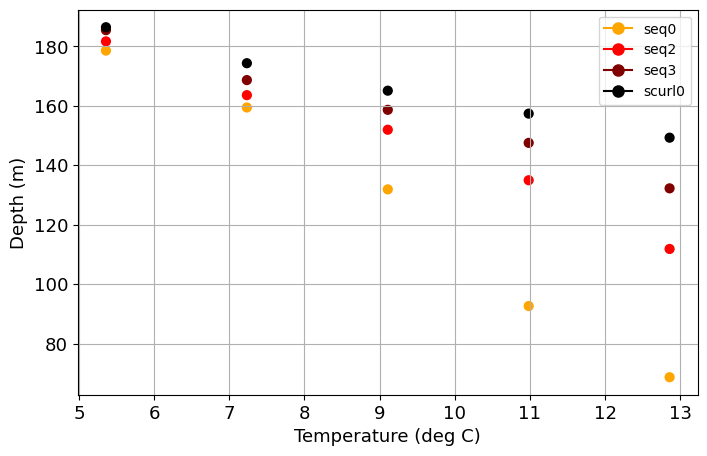

In [31]:

rho2_l_values = np.array([
    1026.928241, 1026.928241, 1026.928241, 1026.928241,
    1026.553241, 1026.553241, 1026.553241, 1026.553241,
    1026.178241, 1026.178241, 1026.178241, 1026.178241,
    1025.803241, 1025.803241, 1025.803241, 1025.803241,
    1025.428241, 1025.428241, 1025.428241, 1025.428241
])

hro_values = [
    seq0_6.isel(xh=1, yh=70).item(),
    seq2_6.isel(xh=1, yh=70).item(),
    seq3_6.isel(xh=1, yh=70).item(),
    scurl0_6.isel(xh=1, yh=70).item(),
    seq0_8.isel(xh=1, yh=70).item(),
    seq2_8.isel(xh=1, yh=70).item(),
    seq3_8.isel(xh=1, yh=70).item(),
    scurl0_8.isel(xh=1, yh=70).item(),
    seq0_9.isel(xh=1, yh=70).item(),
    seq2_9.isel(xh=1, yh=70).item(),
    seq3_9.isel(xh=1, yh=70).item(),
    scurl0_9.isel(xh=1, yh=70).item(),
    seq0_10.isel(xh=1, yh=70).item(),
    seq2_10.isel(xh=1, yh=70).item(),
    seq3_10.isel(xh=1, yh=70).item(),
    scurl0_10.isel(xh=1, yh=70).item(),
    seq0_12.isel(xh=1, yh=70).item(),
    seq2_12.isel(xh=1, yh=70).item(),
    seq3_12.isel(xh=1, yh=70).item(),
    scurl0_12.isel(xh=1, yh=70).item(),
]

colors = []
for i in range(len(hro_values)):
    if i % 4 == 0:
        colors.append('orange')  # Color for indices 0, 4, 8, 12 (eq0)
    elif i % 4 == 1:
        colors.append('red')      # Color for indices 1, 5, 9, 13 (eq2)
    elif i % 4 == 2:
        colors.append('maroon')       # Color for indices 2, 6, 10, 14 (eq3)
    else:
        colors.append('black')         # Color for the rest (no curl)

plt.figure(figsize=(8, 5))
a = (1028 - rho2_l_values) / 0.2
plt.scatter(a, hro_values, c=colors, s=40)

plt.xlabel("rho2_l")
plt.ylabel("hro")


m=8
legend_eq0 = mlines.Line2D([], [], marker='o', color='orange', label='seq0', markersize=m)
legend_eq2 = mlines.Line2D([], [], marker='o', color='red', label='seq2', markersize=m)
legend_eq3 = mlines.Line2D([], [], marker='o', color='maroon', label='seq3', markersize=m)
legend_no_curl = mlines.Line2D([], [], marker='o', color='black', label='scurl0', markersize=m)

plt.legend(handles=[legend_eq0, legend_eq2, legend_eq3, legend_no_curl])

plt.grid(True)
plt.tick_params(axis='both',labelsize=13)
plt.xlabel("Temperature (deg C)", fontsize=13)
plt.ylabel("Depth (m)", fontsize=13)
plt.show()



# Depth of 10 deg Isotherm with latitude, Western Boundary

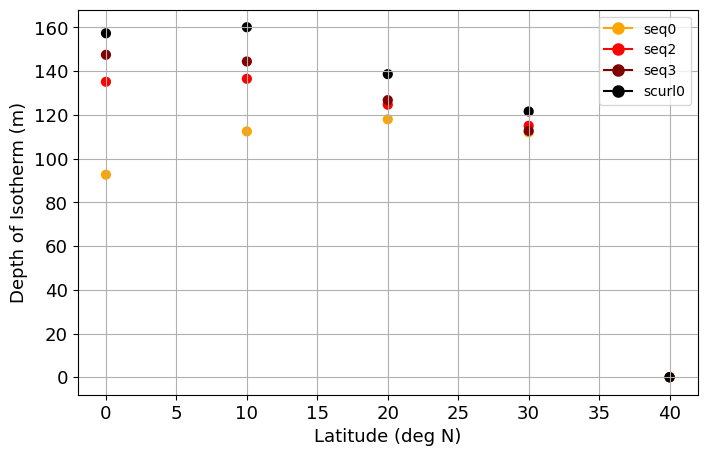

<Figure size 640x480 with 0 Axes>

In [6]:
a = np.array([0,0,0,0,10,10,10,10,20,20,20,20,30,30,30,30,40,40,40,40])

hro_values = [
    seq0_10.isel(xh=1, yh=70).item(),
    seq2n_10.isel(xh=1, yh=70).item(),
    seq3_10.isel(xh=1, yh=70).item(),
    scurl0_10.isel(xh=1, yh=70).item(),
    seq0_10.isel(xh=1, yh=80).item(),
    seq2n_10.isel(xh=1, yh=80).item(),
    seq3_10.isel(xh=1, yh=80).item(),
    scurl0_10.isel(xh=1, yh=80).item(),
    seq0_10.isel(xh=1, yh=90).item(),
    seq2n_10.isel(xh=1, yh=90).item(),
    seq3_10.isel(xh=1, yh=90).item(),
    scurl0_10.isel(xh=1, yh=90).item(),
    seq0_10.isel(xh=1, yh=100).item(),
    seq2n_10.isel(xh=1, yh=100).item(),
    seq3_10.isel(xh=1, yh=100).item(),
    scurl0_10.isel(xh=1, yh=100).item(),
    seq0_10.isel(xh=1, yh=110).item(),
    seq2n_10.isel(xh=1, yh=110).item(),
    seq3_10.isel(xh=1, yh=110).item(),
    scurl0_10.isel(xh=1, yh=110).item(),
]

m=8
legend_eq0 = matplotlib.lines.Line2D([], [], marker='o', color='orange', label='seq0', markersize=m)
legend_eq2 = matplotlib.lines.Line2D([], [], marker='o', color='red', label='seq2', markersize=m)
legend_eq3 = matplotlib.lines.Line2D([], [], marker='o', color='maroon', label='seq3', markersize=m)
legend_no_curl = matplotlib.lines.Line2D([], [], marker='o', color='black', label='scurl0', markersize=m)


colors = []
for i in range(len(hro_values)):
    if i % 4 == 0:
        colors.append('orange')  # Color for indices 0, 4, 8, 12 (eq0)
    elif i % 4 == 1:
        colors.append('red')      # Color for indices 1, 5, 9, 13 (eq2)
    elif i % 4 == 2:
        colors.append('maroon')       # Color for indices 2, 6, 10, 14 (eq3)
    else:
        colors.append('black')         # Color for the rest (no curl)


plt.figure(figsize=(8, 5))
plt.scatter(a, hro_values, c=colors, s=40)
plt.legend(handles=[legend_eq0, legend_eq2, legend_eq3, legend_no_curl])

plt.grid(True)
plt.tick_params(axis='both',labelsize=13)
plt.xlabel("Latitude (deg N)", fontsize=13)
plt.ylabel("Depth of Isotherm (m)", fontsize=13)
plt.show()
plt.savefig('isotherm.png')


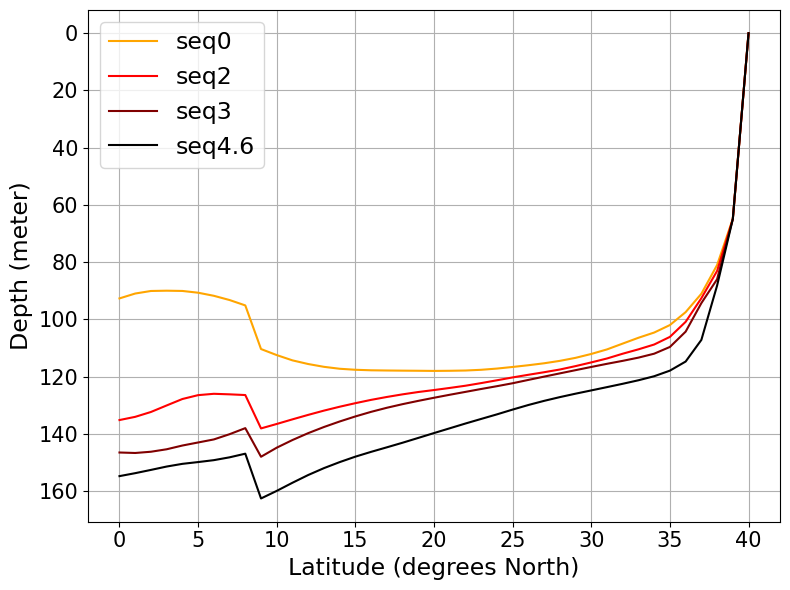

In [10]:
# a = np.array([0,0,0,0,10,10,10,10,20,20,20,20,30,30,30,30,40,40,40,40])

a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

hro_values_seq0 = [
    seq0_10.isel(xh=1, yh=70).item(),
    seq0_10.isel(xh=1, yh=71).item(),
    seq0_10.isel(xh=1, yh=72).item(),
    seq0_10.isel(xh=1, yh=73).item(),
    seq0_10.isel(xh=1, yh=74).item(),
    seq0_10.isel(xh=1, yh=75).item(),
    seq0_10.isel(xh=1, yh=76).item(),
    seq0_10.isel(xh=1, yh=77).item(),
    seq0_10.isel(xh=1, yh=78).item(),
    seq0_10.isel(xh=1, yh=79).item(),
    seq0_10.isel(xh=1, yh=80).item(),
    seq0_10.isel(xh=1, yh=81).item(),
    seq0_10.isel(xh=1, yh=82).item(),
    seq0_10.isel(xh=1, yh=83).item(),
    seq0_10.isel(xh=1, yh=84).item(),
    seq0_10.isel(xh=1, yh=85).item(),
    seq0_10.isel(xh=1, yh=86).item(),
    seq0_10.isel(xh=1, yh=87).item(),
    seq0_10.isel(xh=1, yh=88).item(),
    seq0_10.isel(xh=1, yh=89).item(),
    seq0_10.isel(xh=1, yh=90).item(),
    seq0_10.isel(xh=1, yh=91).item(),
    seq0_10.isel(xh=1, yh=92).item(),
    seq0_10.isel(xh=1, yh=93).item(),
    seq0_10.isel(xh=1, yh=94).item(),
    seq0_10.isel(xh=1, yh=95).item(),
    seq0_10.isel(xh=1, yh=96).item(),
    seq0_10.isel(xh=1, yh=97).item(),
    seq0_10.isel(xh=1, yh=98).item(),
    seq0_10.isel(xh=1, yh=99).item(),
    seq0_10.isel(xh=1, yh=100).item(),
    seq0_10.isel(xh=1, yh=101).item(),
    seq0_10.isel(xh=1, yh=102).item(),
    seq0_10.isel(xh=1, yh=103).item(),
    seq0_10.isel(xh=1, yh=104).item(),
    seq0_10.isel(xh=1, yh=105).item(),
    seq0_10.isel(xh=1, yh=106).item(),
    seq0_10.isel(xh=1, yh=107).item(),
    seq0_10.isel(xh=1, yh=108).item(),
    seq0_10.isel(xh=1, yh=109).item(),
    seq0_10.isel(xh=1, yh=110).item()]

hro_values_seq2 = [
    seq2n_10.isel(xh=1, yh=70).item(),
    seq2n_10.isel(xh=1, yh=71).item(),
    seq2n_10.isel(xh=1, yh=72).item(),
    seq2n_10.isel(xh=1, yh=73).item(),
    seq2n_10.isel(xh=1, yh=74).item(),
    seq2n_10.isel(xh=1, yh=75).item(),
    seq2n_10.isel(xh=1, yh=76).item(),
    seq2n_10.isel(xh=1, yh=77).item(),
    seq2n_10.isel(xh=1, yh=78).item(),
    seq2n_10.isel(xh=1, yh=79).item(),
    seq2n_10.isel(xh=1, yh=80).item(),
    seq2n_10.isel(xh=1, yh=81).item(),
    seq2n_10.isel(xh=1, yh=82).item(),
    seq2n_10.isel(xh=1, yh=83).item(),
    seq2n_10.isel(xh=1, yh=84).item(),
    seq2n_10.isel(xh=1, yh=85).item(),
    seq2n_10.isel(xh=1, yh=86).item(),
    seq2n_10.isel(xh=1, yh=87).item(),
    seq2n_10.isel(xh=1, yh=88).item(),
    seq2n_10.isel(xh=1, yh=89).item(),
    seq2n_10.isel(xh=1, yh=90).item(),
    seq2n_10.isel(xh=1, yh=91).item(),
    seq2n_10.isel(xh=1, yh=92).item(),
    seq2n_10.isel(xh=1, yh=93).item(),
    seq2n_10.isel(xh=1, yh=94).item(),
    seq2n_10.isel(xh=1, yh=95).item(),
    seq2n_10.isel(xh=1, yh=96).item(),
    seq2n_10.isel(xh=1, yh=97).item(),
    seq2n_10.isel(xh=1, yh=98).item(),
    seq2n_10.isel(xh=1, yh=99).item(),
    seq2n_10.isel(xh=1, yh=100).item(),
    seq2n_10.isel(xh=1, yh=101).item(),
    seq2n_10.isel(xh=1, yh=102).item(),
    seq2n_10.isel(xh=1, yh=103).item(),
    seq2n_10.isel(xh=1, yh=104).item(),
    seq2n_10.isel(xh=1, yh=105).item(),
    seq2n_10.isel(xh=1, yh=106).item(),
    seq2n_10.isel(xh=1, yh=107).item(),
    seq2n_10.isel(xh=1, yh=108).item(),
    seq2n_10.isel(xh=1, yh=109).item(),
    seq2n_10.isel(xh=1, yh=110).item()]

hro_values_seq3 = [
    seq3_10.isel(xh=1, yh=70).item(),
    seq3_10.isel(xh=1, yh=71).item(),
    seq3_10.isel(xh=1, yh=72).item(),
    seq3_10.isel(xh=1, yh=73).item(),
    seq3_10.isel(xh=1, yh=74).item(),
    seq3_10.isel(xh=1, yh=75).item(),
    seq3_10.isel(xh=1, yh=76).item(),
    seq3_10.isel(xh=1, yh=77).item(),
    seq3_10.isel(xh=1, yh=78).item(),
    seq3_10.isel(xh=1, yh=79).item(),
    seq3_10.isel(xh=1, yh=80).item(),
    seq3_10.isel(xh=1, yh=81).item(),
    seq3_10.isel(xh=1, yh=82).item(),
    seq3_10.isel(xh=1, yh=83).item(),
    seq3_10.isel(xh=1, yh=84).item(),
    seq3_10.isel(xh=1, yh=85).item(),
    seq3_10.isel(xh=1, yh=86).item(),
    seq3_10.isel(xh=1, yh=87).item(),
    seq3_10.isel(xh=1, yh=88).item(),
    seq3_10.isel(xh=1, yh=89).item(),
    seq3_10.isel(xh=1, yh=90).item(),
    seq3_10.isel(xh=1, yh=91).item(),
    seq3_10.isel(xh=1, yh=92).item(),
    seq3_10.isel(xh=1, yh=93).item(),
    seq3_10.isel(xh=1, yh=94).item(),
    seq3_10.isel(xh=1, yh=95).item(),
    seq3_10.isel(xh=1, yh=96).item(),
    seq3_10.isel(xh=1, yh=97).item(),
    seq3_10.isel(xh=1, yh=98).item(),
    seq3_10.isel(xh=1, yh=99).item(),
    seq3_10.isel(xh=1, yh=100).item(),
    seq3_10.isel(xh=1, yh=101).item(),
    seq3_10.isel(xh=1, yh=102).item(),
    seq3_10.isel(xh=1, yh=103).item(),
    seq3_10.isel(xh=1, yh=104).item(),
    seq3_10.isel(xh=1, yh=105).item(),
    seq3_10.isel(xh=1, yh=106).item(),
    seq3_10.isel(xh=1, yh=107).item(),
    seq3_10.isel(xh=1, yh=108).item(),
    seq3_10.isel(xh=1, yh=109).item(),
    seq3_10.isel(xh=1, yh=110).item()]

hro_values_scurl0 = [
    scurl0_10.isel(xh=1, yh=70).item(),
    scurl0_10.isel(xh=1, yh=71).item(),
    scurl0_10.isel(xh=1, yh=72).item(),
    scurl0_10.isel(xh=1, yh=73).item(),
    scurl0_10.isel(xh=1, yh=74).item(),
    scurl0_10.isel(xh=1, yh=75).item(),
    scurl0_10.isel(xh=1, yh=76).item(),
    scurl0_10.isel(xh=1, yh=77).item(),
    scurl0_10.isel(xh=1, yh=78).item(),
    scurl0_10.isel(xh=1, yh=79).item(),
    scurl0_10.isel(xh=1, yh=80).item(),
    scurl0_10.isel(xh=1, yh=81).item(),
    scurl0_10.isel(xh=1, yh=82).item(),
    scurl0_10.isel(xh=1, yh=83).item(),
    scurl0_10.isel(xh=1, yh=84).item(),
    scurl0_10.isel(xh=1, yh=85).item(),
    scurl0_10.isel(xh=1, yh=86).item(),
    scurl0_10.isel(xh=1, yh=87).item(),
    scurl0_10.isel(xh=1, yh=88).item(),
    scurl0_10.isel(xh=1, yh=89).item(),
    scurl0_10.isel(xh=1, yh=90).item(),
    scurl0_10.isel(xh=1, yh=91).item(),
    scurl0_10.isel(xh=1, yh=92).item(),
    scurl0_10.isel(xh=1, yh=93).item(),
    scurl0_10.isel(xh=1, yh=94).item(),
    scurl0_10.isel(xh=1, yh=95).item(),
    scurl0_10.isel(xh=1, yh=96).item(),
    scurl0_10.isel(xh=1, yh=97).item(),
    scurl0_10.isel(xh=1, yh=98).item(),
    scurl0_10.isel(xh=1, yh=99).item(),
    scurl0_10.isel(xh=1, yh=100).item(),
    scurl0_10.isel(xh=1, yh=101).item(),
    scurl0_10.isel(xh=1, yh=102).item(),
    scurl0_10.isel(xh=1, yh=103).item(),
    scurl0_10.isel(xh=1, yh=104).item(),
    scurl0_10.isel(xh=1, yh=105).item(),
    scurl0_10.isel(xh=1, yh=106).item(),
    scurl0_10.isel(xh=1, yh=107).item(),
    scurl0_10.isel(xh=1, yh=108).item(),
    scurl0_10.isel(xh=1, yh=109).item(),
    scurl0_10.isel(xh=1, yh=110).item()]


plt.figure(figsize=(8,6))
plt.plot(a, hro_values_seq0, linestyle='-', color='orange', label='seq0')
plt.plot(a, hro_values_seq2, linestyle='-', color='r', label='seq2')
plt.plot(a, hro_values_seq3, linestyle='-', color='maroon', label='seq3')
plt.plot(a, hro_values_scurl0, linestyle='-', color='black', label='seq4.6')

plt.gca().invert_yaxis()

plt.grid(True)
plt.xlabel('Latitude (degrees North)', fontsize=17)
plt.ylabel('Depth (meter)', fontsize=17)
plt.legend(fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('depthofiso.png')
plt.show()

#edits

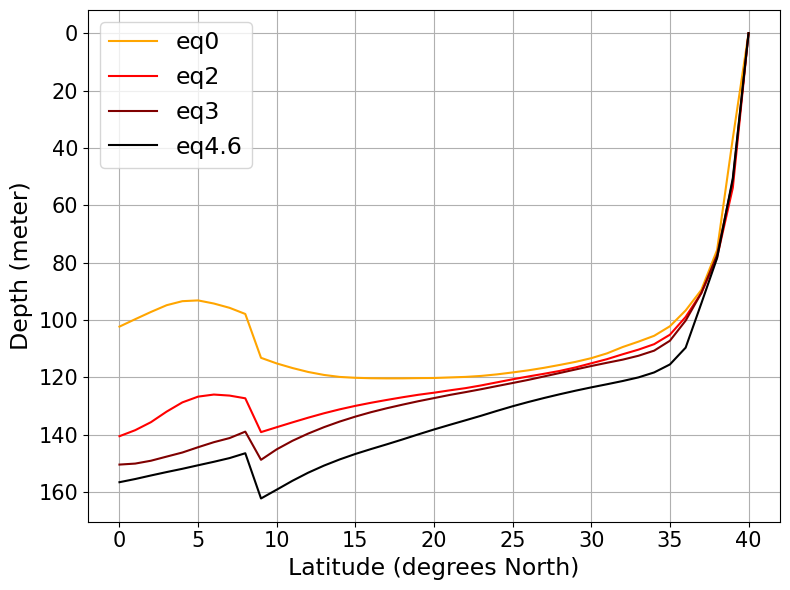

In [11]:
# a = np.array([0,0,0,0,10,10,10,10,20,20,20,20,30,30,30,30,40,40,40,40])

a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

hro_values_eq0 = [
    eq0_10.isel(xh=1, yh=70).item(),
    eq0_10.isel(xh=1, yh=71).item(),
    eq0_10.isel(xh=1, yh=72).item(),
    eq0_10.isel(xh=1, yh=73).item(),
    eq0_10.isel(xh=1, yh=74).item(),
    eq0_10.isel(xh=1, yh=75).item(),
    eq0_10.isel(xh=1, yh=76).item(),
    eq0_10.isel(xh=1, yh=77).item(),
    eq0_10.isel(xh=1, yh=78).item(),
    eq0_10.isel(xh=1, yh=79).item(),
    eq0_10.isel(xh=1, yh=80).item(),
    eq0_10.isel(xh=1, yh=81).item(),
    eq0_10.isel(xh=1, yh=82).item(),
    eq0_10.isel(xh=1, yh=83).item(),
    eq0_10.isel(xh=1, yh=84).item(),
    eq0_10.isel(xh=1, yh=85).item(),
    eq0_10.isel(xh=1, yh=86).item(),
    eq0_10.isel(xh=1, yh=87).item(),
    eq0_10.isel(xh=1, yh=88).item(),
    eq0_10.isel(xh=1, yh=89).item(),
    eq0_10.isel(xh=1, yh=90).item(),
    eq0_10.isel(xh=1, yh=91).item(),
    eq0_10.isel(xh=1, yh=92).item(),
    eq0_10.isel(xh=1, yh=93).item(),
    eq0_10.isel(xh=1, yh=94).item(),
    eq0_10.isel(xh=1, yh=95).item(),
    eq0_10.isel(xh=1, yh=96).item(),
    eq0_10.isel(xh=1, yh=97).item(),
    eq0_10.isel(xh=1, yh=98).item(),
    eq0_10.isel(xh=1, yh=99).item(),
    eq0_10.isel(xh=1, yh=100).item(),
    eq0_10.isel(xh=1, yh=101).item(),
    eq0_10.isel(xh=1, yh=102).item(),
    eq0_10.isel(xh=1, yh=103).item(),
    eq0_10.isel(xh=1, yh=104).item(),
    eq0_10.isel(xh=1, yh=105).item(),
    eq0_10.isel(xh=1, yh=106).item(),
    eq0_10.isel(xh=1, yh=107).item(),
    eq0_10.isel(xh=1, yh=108).item(),
    eq0_10.isel(xh=1, yh=109).item(),
    eq0_10.isel(xh=1, yh=110).item()]

hro_values_eq2 = [
    eq2_10.isel(xh=1, yh=70).item(),
    eq2_10.isel(xh=1, yh=71).item(),
    eq2_10.isel(xh=1, yh=72).item(),
    eq2_10.isel(xh=1, yh=73).item(),
    eq2_10.isel(xh=1, yh=74).item(),
    eq2_10.isel(xh=1, yh=75).item(),
    eq2_10.isel(xh=1, yh=76).item(),
    eq2_10.isel(xh=1, yh=77).item(),
    eq2_10.isel(xh=1, yh=78).item(),
    eq2_10.isel(xh=1, yh=79).item(),
    eq2_10.isel(xh=1, yh=80).item(),
    eq2_10.isel(xh=1, yh=81).item(),
    eq2_10.isel(xh=1, yh=82).item(),
    eq2_10.isel(xh=1, yh=83).item(),
    eq2_10.isel(xh=1, yh=84).item(),
    eq2_10.isel(xh=1, yh=85).item(),
    eq2_10.isel(xh=1, yh=86).item(),
    eq2_10.isel(xh=1, yh=87).item(),
    eq2_10.isel(xh=1, yh=88).item(),
    eq2_10.isel(xh=1, yh=89).item(),
    eq2_10.isel(xh=1, yh=90).item(),
    eq2_10.isel(xh=1, yh=91).item(),
    eq2_10.isel(xh=1, yh=92).item(),
    eq2_10.isel(xh=1, yh=93).item(),
    eq2_10.isel(xh=1, yh=94).item(),
    eq2_10.isel(xh=1, yh=95).item(),
    eq2_10.isel(xh=1, yh=96).item(),
    eq2_10.isel(xh=1, yh=97).item(),
    eq2_10.isel(xh=1, yh=98).item(),
    eq2_10.isel(xh=1, yh=99).item(),
    eq2_10.isel(xh=1, yh=100).item(),
    eq2_10.isel(xh=1, yh=101).item(),
    eq2_10.isel(xh=1, yh=102).item(),
    eq2_10.isel(xh=1, yh=103).item(),
    eq2_10.isel(xh=1, yh=104).item(),
    eq2_10.isel(xh=1, yh=105).item(),
    eq2_10.isel(xh=1, yh=106).item(),
    eq2_10.isel(xh=1, yh=107).item(),
    eq2_10.isel(xh=1, yh=108).item(),
    eq2_10.isel(xh=1, yh=109).item(),
    eq2_10.isel(xh=1, yh=110).item()]

hro_values_eq3 = [
    eq3_10.isel(xh=1, yh=70).item(),
    eq3_10.isel(xh=1, yh=71).item(),
    eq3_10.isel(xh=1, yh=72).item(),
    eq3_10.isel(xh=1, yh=73).item(),
    eq3_10.isel(xh=1, yh=74).item(),
    eq3_10.isel(xh=1, yh=75).item(),
    eq3_10.isel(xh=1, yh=76).item(),
    eq3_10.isel(xh=1, yh=77).item(),
    eq3_10.isel(xh=1, yh=78).item(),
    eq3_10.isel(xh=1, yh=79).item(),
    eq3_10.isel(xh=1, yh=80).item(),
    eq3_10.isel(xh=1, yh=81).item(),
    eq3_10.isel(xh=1, yh=82).item(),
    eq3_10.isel(xh=1, yh=83).item(),
    eq3_10.isel(xh=1, yh=84).item(),
    eq3_10.isel(xh=1, yh=85).item(),
    eq3_10.isel(xh=1, yh=86).item(),
    eq3_10.isel(xh=1, yh=87).item(),
    eq3_10.isel(xh=1, yh=88).item(),
    eq3_10.isel(xh=1, yh=89).item(),
    eq3_10.isel(xh=1, yh=90).item(),
    eq3_10.isel(xh=1, yh=91).item(),
    eq3_10.isel(xh=1, yh=92).item(),
    eq3_10.isel(xh=1, yh=93).item(),
    eq3_10.isel(xh=1, yh=94).item(),
    eq3_10.isel(xh=1, yh=95).item(),
    eq3_10.isel(xh=1, yh=96).item(),
    eq3_10.isel(xh=1, yh=97).item(),
    eq3_10.isel(xh=1, yh=98).item(),
    eq3_10.isel(xh=1, yh=99).item(),
    eq3_10.isel(xh=1, yh=100).item(),
    eq3_10.isel(xh=1, yh=101).item(),
    eq3_10.isel(xh=1, yh=102).item(),
    eq3_10.isel(xh=1, yh=103).item(),
    eq3_10.isel(xh=1, yh=104).item(),
    eq3_10.isel(xh=1, yh=105).item(),
    eq3_10.isel(xh=1, yh=106).item(),
    eq3_10.isel(xh=1, yh=107).item(),
    eq3_10.isel(xh=1, yh=108).item(),
    eq3_10.isel(xh=1, yh=109).item(),
    eq3_10.isel(xh=1, yh=110).item()]

hro_values_curl0 = [
    curl0_10.isel(xh=1, yh=70).item(),
    curl0_10.isel(xh=1, yh=71).item(),
    curl0_10.isel(xh=1, yh=72).item(),
    curl0_10.isel(xh=1, yh=73).item(),
    curl0_10.isel(xh=1, yh=74).item(),
    curl0_10.isel(xh=1, yh=75).item(),
    curl0_10.isel(xh=1, yh=76).item(),
    curl0_10.isel(xh=1, yh=77).item(),
    curl0_10.isel(xh=1, yh=78).item(),
    curl0_10.isel(xh=1, yh=79).item(),
    curl0_10.isel(xh=1, yh=80).item(),
    curl0_10.isel(xh=1, yh=81).item(),
    curl0_10.isel(xh=1, yh=82).item(),
    curl0_10.isel(xh=1, yh=83).item(),
    curl0_10.isel(xh=1, yh=84).item(),
    curl0_10.isel(xh=1, yh=85).item(),
    curl0_10.isel(xh=1, yh=86).item(),
    curl0_10.isel(xh=1, yh=87).item(),
    curl0_10.isel(xh=1, yh=88).item(),
    curl0_10.isel(xh=1, yh=89).item(),
    curl0_10.isel(xh=1, yh=90).item(),
    curl0_10.isel(xh=1, yh=91).item(),
    curl0_10.isel(xh=1, yh=92).item(),
    curl0_10.isel(xh=1, yh=93).item(),
    curl0_10.isel(xh=1, yh=94).item(),
    curl0_10.isel(xh=1, yh=95).item(),
    curl0_10.isel(xh=1, yh=96).item(),
    curl0_10.isel(xh=1, yh=97).item(),
    curl0_10.isel(xh=1, yh=98).item(),
    curl0_10.isel(xh=1, yh=99).item(),
    curl0_10.isel(xh=1, yh=100).item(),
    curl0_10.isel(xh=1, yh=101).item(),
    curl0_10.isel(xh=1, yh=102).item(),
    curl0_10.isel(xh=1, yh=103).item(),
    curl0_10.isel(xh=1, yh=104).item(),
    curl0_10.isel(xh=1, yh=105).item(),
    curl0_10.isel(xh=1, yh=106).item(),
    curl0_10.isel(xh=1, yh=107).item(),
    curl0_10.isel(xh=1, yh=108).item(),
    curl0_10.isel(xh=1, yh=109).item(),
    curl0_10.isel(xh=1, yh=110).item()]


plt.figure(figsize=(8,6))
plt.plot(a, hro_values_eq0, linestyle='-', color='orange', label='eq0')
plt.plot(a, hro_values_eq2, linestyle='-', color='r', label='eq2')
plt.plot(a, hro_values_eq3, linestyle='-', color='maroon', label='eq3')
plt.plot(a, hro_values_curl0, linestyle='-', color='black', label='eq4.6')

plt.gca().invert_yaxis()

plt.grid(True)
plt.xlabel('Latitude (degrees North)', fontsize=17)
plt.ylabel('Depth (meter)', fontsize=17)
plt.legend(fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('depthofiso.png')
plt.show()

#edits